## KNN Lazy learning method

### 1- Loading of data

In [45]:
import pandas as pd
try:
    diabetes_df = pd.read_csv('../preprocessing_scripts/Data_preprocessed_10000.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    diabetes_df = None
    print("File not found. Please check the file path.")

Dataset loaded successfully.


### 2- Visualize first columns

In [46]:
diabetes_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,0.0,1.0,1.0,-1.071593,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,10.0,4.0,5.0
1,0.0,0.0,0.0,1.0,0.628607,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,3.0,1.0,0.0,13.0,5.0,4.0
2,0.0,1.0,1.0,1.0,-0.319133,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,5.0,0.0,1.0,8.0,6.0,6.0
3,0.0,0.0,1.0,1.0,0.017644,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,7.0,5.0,8.0
4,1.0,1.0,0.0,1.0,2.311887,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,30.0,10.0,1.0,1.0,6.0,6.0,3.0


### 3- Separate the features and target variable

In [47]:
# Let's separate Data from labels

X = diabetes_df.drop(['Diabetes_binary'], axis=1) # Data
y = diabetes_df['Diabetes_binary'].astype(int)# Label (Has diabtes (1) or not (0))

print(X.shape)
print(y.shape)

(9939, 21)
(9939,)


### 4 - Normalize data

In [48]:
# Check what is the actual score without any normalize
# We are going to use k-fold cross validation
# We apply to all methods the same random state 42

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import sklearn.neighbors as nb
import numpy as np

# Ensures each fold maintains the same class distribution as the full dataset, 
# which is crucial for imbalanced classification tasks.
cv = StratifiedKFold(n_splits=20, random_state=42, shuffle = True) 

# We are going to use the KNeighborsClassifier without any parameter tuning so,
# it will use 5 neighbors by default. Later we will use the GridSearchCV to find the best parameters
# for the KNeighborsClassifier
cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X,y=y, cv=cv, scoring='accuracy')  
np.mean(cv_scores)

np.float64(0.6992657558252742)

In [49]:
#Let's see the difference of range of the data

# 1) Obtain the names of the columns
column_names = diabetes_df.drop('Diabetes_binary', axis=1).columns.tolist()

# 2)Iterate over the columns and print the standard deviation, min and max
for name in column_names:
    col_array = X[name]  # Usar indexación de pandas por nombre de columna
    print(f"column: {name}"
          f"  std: {col_array.std():.4f}"
          f"  min: {col_array.min():.4f}"
          f"  max: {col_array.max():.4f}")

column: HighBP  std: 0.4960  min: 0.0000  max: 1.0000
column: HighChol  std: 0.4989  min: 0.0000  max: 1.0000
column: CholCheck  std: 0.1458  min: 0.0000  max: 1.0000
column: BMI  std: 1.0001  min: -3.0508  max: 3.1507
column: Smoker  std: 0.4996  min: 0.0000  max: 1.0000
column: Stroke  std: 0.2426  min: 0.0000  max: 1.0000
column: HeartDiseaseorAttack  std: 0.3546  min: 0.0000  max: 1.0000
column: PhysActivity  std: 0.4578  min: 0.0000  max: 1.0000
column: Fruits  std: 0.4893  min: 0.0000  max: 1.0000
column: Veggies  std: 0.4109  min: 0.0000  max: 1.0000
column: HvyAlcoholConsump  std: 0.1930  min: 0.0000  max: 1.0000
column: AnyHealthcare  std: 0.2023  min: 0.0000  max: 1.0000
column: NoDocbcCost  std: 0.2947  min: 0.0000  max: 1.0000
column: GenHlth  std: 1.1188  min: 1.0000  max: 5.0000
column: MentHlth  std: 8.1853  min: 0.0000  max: 30.0000
column: PhysHlth  std: 10.0961  min: 0.0000  max: 30.0000
column: DiffWalk  std: 0.4364  min: 0.0000  max: 1.0000
column: Sex  std: 0.4979 

In [50]:
# Let's do the normalization of the data
# CAVEAT: Data should be normalized or standardized in order to ensure same relevance to each feature in the computation of distance.
# With normalization we avoid being fooled by noise.
# We are going to use the StandardScaler

# Let's solve that
from sklearn import preprocessing

# One way is to standarize all data mean 0, std 1

scaler = preprocessing.StandardScaler().fit_transform(X.drop(columns=['BMI']))
X2= pd.DataFrame(scaler, columns=X.columns.drop('BMI')) 

for name in column_names:
    col_array = X[name]  # Usar indexación de pandas por nombre de columna
    print(f"column: {name}"
          f"  std: {col_array.std():.4f}"
          f"  min: {col_array.min():.4f}"
          f"  max: {col_array.max():.4f}")
    
# Let's repeat the 10-fold Cross-validation with new data X2
cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X2,y=y, cv=cv, scoring='accuracy')  
np.mean(cv_scores)

#We see that the accuracy is worse than the previous one because 

column: HighBP  std: 0.4960  min: 0.0000  max: 1.0000
column: HighChol  std: 0.4989  min: 0.0000  max: 1.0000
column: CholCheck  std: 0.1458  min: 0.0000  max: 1.0000
column: BMI  std: 1.0001  min: -3.0508  max: 3.1507
column: Smoker  std: 0.4996  min: 0.0000  max: 1.0000
column: Stroke  std: 0.2426  min: 0.0000  max: 1.0000
column: HeartDiseaseorAttack  std: 0.3546  min: 0.0000  max: 1.0000
column: PhysActivity  std: 0.4578  min: 0.0000  max: 1.0000
column: Fruits  std: 0.4893  min: 0.0000  max: 1.0000
column: Veggies  std: 0.4109  min: 0.0000  max: 1.0000
column: HvyAlcoholConsump  std: 0.1930  min: 0.0000  max: 1.0000
column: AnyHealthcare  std: 0.2023  min: 0.0000  max: 1.0000
column: NoDocbcCost  std: 0.2947  min: 0.0000  max: 1.0000
column: GenHlth  std: 1.1188  min: 1.0000  max: 5.0000
column: MentHlth  std: 8.1853  min: 0.0000  max: 30.0000
column: PhysHlth  std: 10.0961  min: 0.0000  max: 30.0000
column: DiffWalk  std: 0.4364  min: 0.0000  max: 1.0000
column: Sex  std: 0.4979 

np.float64(0.6857820308950477)

### 5- Detection of irrelevant features


In [51]:
# Let's build a pandas dataframe to work with columns

df=pd.DataFrame(data=X, columns=column_names)
df['Diabetes_binary']=y
df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,0.0,1.0,1.0,-1.071593,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,4.0,0.0,0.0,0.0,0.0,10.0,4.0,5.0,1
1,0.0,0.0,1.0,0.628607,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,3.0,0.0,3.0,1.0,0.0,13.0,5.0,4.0,0
2,1.0,1.0,1.0,-0.319133,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,5.0,0.0,1.0,8.0,6.0,6.0,0
3,0.0,1.0,1.0,0.017644,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,3.0,0.0,5.0,0.0,1.0,7.0,5.0,8.0,0
4,1.0,0.0,1.0,2.311887,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,4.0,30.0,10.0,1.0,1.0,6.0,6.0,3.0,1


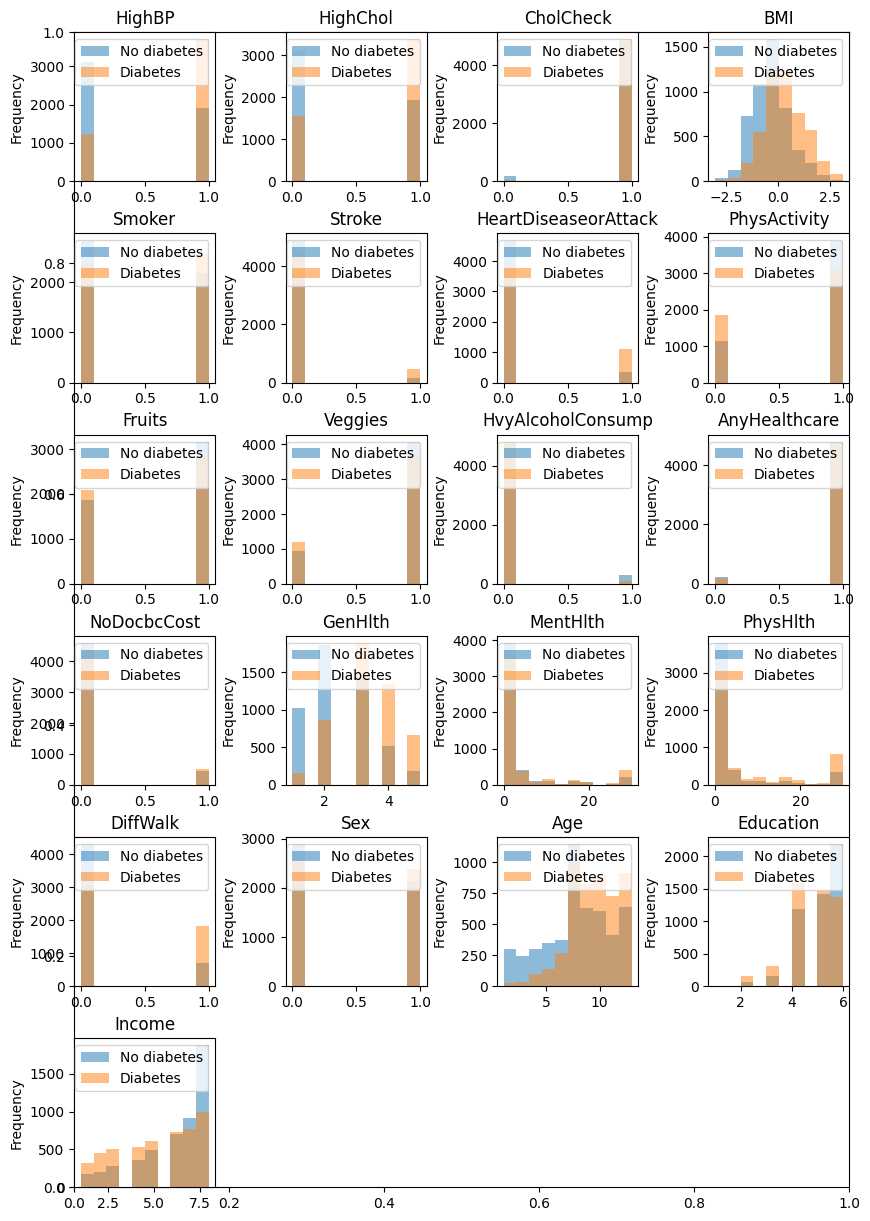

In [52]:
# Let's which features are more important i other words, which features help us to separate the data 
# in groups without supersititon.

# However, we will use sklearn to select the best k features. Fit that on whole data set and return only relevant columns. 

import matplotlib.pyplot as  plt

n = len(column_names)
cols = 4
rows = (n + cols - 1) // cols  


plt.subplots(figsize=(10, rows * 2.5))
plt.subplots_adjust(hspace=0.35,wspace=0.5)

for idx, col in enumerate(column_names):
    plt.subplot(rows, cols, idx + 1)

    df[df['Diabetes_binary'] == 0][col].plot.hist(
        bins=10, alpha=0.5, label='No diabetes'
    )

    df[df['Diabetes_binary'] == 1][col].plot.hist(
        bins=10, alpha=0.5, label='Diabetes'
    )
    plt.title(col)
    plt.legend()
plt.show()

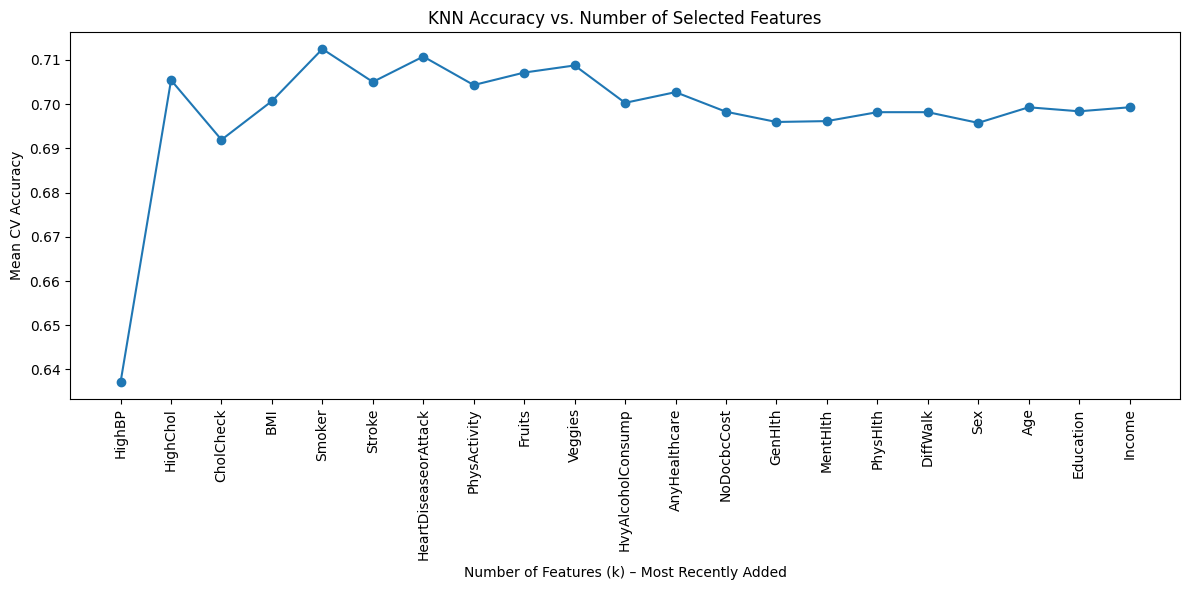

In [53]:
# Let's use SKLearn to select the best features
# We avoid to be fooled by irrelevant features

# Improvement in accuracy
# Unfortunately, we don't know before hand the relevant feature.

# Sklearn to the rescue!

from sklearn.feature_selection import mutual_info_classif # Calculate the mutual information between each feature and the target
from sklearn.feature_selection import SelectKBest # Select the k best features based on the mutual information score

# We are going to iterate over different values ok k and see which one is the best
# Array to hold mean CV accuracy for each k
scores_by_k = np.zeros(len(column_names))

for idx, feature in enumerate(column_names):
    k = idx + 1
    # Select the k best features by mutual information
    X_selected = SelectKBest(mutual_info_classif, k=k).fit_transform(X, y)

    # Evaluate with stratified CV and KNN
    cv_scores = cross_val_score(
        nb.KNeighborsClassifier(),
        X_selected,
        y,
        cv=cv,
        scoring='accuracy'
    )
    scores_by_k[idx] = np.mean(cv_scores)

# Plot: x-axis labels are the name of the last feature added for each k
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(column_names) + 1), scores_by_k, marker='o')
plt.xticks(
    ticks=range(1, len(column_names) + 1),
    labels=column_names,
    rotation=90
)
plt.xlabel('Number of Features (k) – Most Recently Added')
plt.ylabel('Mean CV Accuracy')
plt.title('KNN Accuracy vs. Number of Selected Features')
plt.tight_layout()
plt.show()

# We see that the accuracy stops increasing after the first 5 features.


### 6- Compare between base or smart KNN

9939
Selected features: ['HighBP', 'HighChol', 'BMI', 'GenHlth', 'Age']


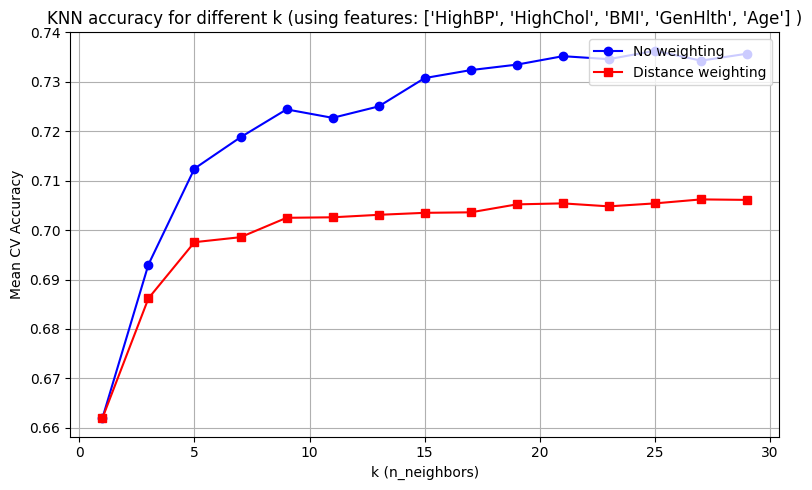

In [54]:
selector_best = SelectKBest(mutual_info_classif, k=5) # Select the top t features
X_new_best = selector_best.fit_transform(X, y) 

print(len(X))
selected_features = [column_names[i] for i, keep in enumerate(selector_best.get_support()) if keep]
print("Selected features:", selected_features)

# Base KNN classifier
scores_no_weight = []
for k in range(1, 30, 2):
    knn = nb.KNeighborsClassifier(n_neighbors=k, weights='uniform')
    cv_scores = cross_val_score(knn, X_new_best, y, cv=cv)
    scores_no_weight.append(np.mean(cv_scores))

# SMART KNN classifier
scores_weight = []
for k in range(1, 30, 2):
    knn = nb.KNeighborsClassifier(n_neighbors=k, weights='distance')
    cv_scores = cross_val_score(knn, X_new_best, y, cv=cv)
    scores_weight.append(np.mean(cv_scores))

plt.figure(figsize=(8, 5))
plt.plot(range(1, 30, 2), scores_no_weight, 'b-o', label='No weighting')
plt.plot(range(1, 30, 2), scores_weight,   'r-s', label='Distance weighting')
plt.xlabel('k (n_neighbors)')
plt.ylabel('Mean CV Accuracy')
plt.title('KNN accuracy for different k (using features: {} )'.format(selected_features))
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

### 7- Find best parameters


In [55]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)
clf.fit(X_new_best, y)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'n_neighbors': 25, 'weights': 'uniform'} Accuracy= 0.7362911339001753


### 8- LDA for dimensionality reduction

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit(X, y).transform(X)

params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  
clf.fit(X_lda, y)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'n_neighbors': 25, 'weights': 'uniform'} Accuracy= 0.7410190984617383


### 9- Confusion matrix


              precision    recall  f1-score   support

           0       0.75      0.66      0.70      5020
           1       0.69      0.78      0.73      4919

    accuracy                           0.72      9939
   macro avg       0.72      0.72      0.72      9939
weighted avg       0.72      0.72      0.72      9939



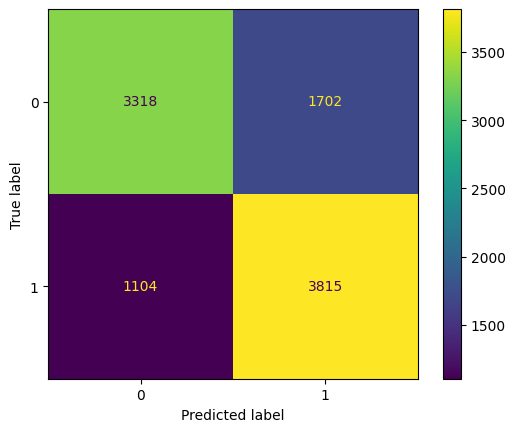

In [57]:
from sklearn.calibration import cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix

knn = nb.KNeighborsClassifier(n_neighbors=clf.best_params_['n_neighbors'], weights=clf.best_params_['weights'])

predicted = cross_val_predict(
    knn,
    X = X,
    y = y, 
    cv = cv
)

print(classification_report(y, predicted))  
ConfusionMatrixDisplay(confusion_matrix(y, predicted)).plot()

### 9 - Maximize recall


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score


recall_scorer = make_scorer(recall_score, average='binary', pos_label=1) 

# Ampliar la búsqueda de parámetros
params = {
    'n_neighbors': list(range(1, 30, 2)),
    'weights': ('distance', 'uniform'),
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]
}


knc = nb.KNeighborsClassifier()
clf = GridSearchCV(
    knc, 
    params, 
    cv=cv,
    scoring=recall_scorer,
    verbose=1
)

clf.fit(X, y)
print(f"Best Params= {clf.best_params_} Recall= {clf.best_score_:.4f}")

knn_recall = nb.KNeighborsClassifier(**clf.best_params_)

predicted = cross_val_predict(
    knn_recall,
    X=X,
    y=y,
    cv=cv
)

print(classification_report(y, predicted))
ConfusionMatrixDisplay(confusion_matrix(y, predicted)).plot()

Fitting 20 folds for each of 180 candidates, totalling 3600 fits
